# Proyek Data Analysis Menggunakan Phyton & Pembuatan Dashboard Sederhana Menggunakan Streamlit

Nama                 : Anugrah Budi Widhianto
Email                : Nugiewidhianto@gmail.com
Dataset Yang Dipilih : Bike Sharing Dataset

# Data Analytics using Phyton

## Deploy Libraries yang diperlukan

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read Dataset Day, Pengecekan Value Null & Duplicate Value

In [53]:
day_df = pd.read_csv('data/day.csv')
print(day_df.isnull().sum())
print('-' * 25)
print("duplicate row values =",day_df.duplicated().sum())
print(day_df.head(10))

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
-------------------------
duplicate row values = 0
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   
5        6  2011-01-06       1   0     1        0        4           1   
6        7  2011-01-07       1   0     1        0        5           1   
7        8  2011-01-08       1   0     1        0        6           0   
8        9  20

## Read Dataset Hour, Pengecekan Value Null & Duplicate Value

In [54]:
hour_df = pd.read_csv('data/hour.csv')
print(hour_df.isnull().sum())
print('-' * 25)
print("duplicate row values =",hour_df.duplicated().sum())
print(hour_df.head(10))

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
-------------------------
duplicate row values = 0
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   
5        6  2011-01-01       1   0     1   5        0        6           0   
6        7  2011-01-01       1   0     1   6        0        6           0   
7        8  2011-01-01       1   0     1

## Cek Rows Count Dataset Day

Melakukan pengecekan awal terhadap jumlah rows pada dataset 'Day'

In [55]:
print(day_df.count())

instant       731
dteday        731
season        731
yr            731
mnth          731
holiday       731
weekday       731
workingday    731
weathersit    731
temp          731
atemp         731
hum           731
windspeed     731
casual        731
registered    731
cnt           731
dtype: int64


## Pembuatan Rumus Outliers Dataset Day & Pengecekan Ulang Jumlah Rows

In [56]:
Q1 = (day_df['cnt']).quantile(0.25)
Q3 = (day_df['cnt']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = day_df['cnt'] < minimum
kondisi_more_than = day_df['cnt'] > maximum
 
day_df.drop(day_df[kondisi_lower_than].index, inplace=True)

In [57]:
print(day_df.count())

instant       731
dteday        731
season        731
yr            731
mnth          731
holiday       731
weekday       731
workingday    731
weathersit    731
temp          731
atemp         731
hum           731
windspeed     731
casual        731
registered    731
cnt           731
dtype: int64


## Cek Rows Count Dataset Hour, Pembuatan Rumus Outliers dan Pengecekan ulang rows count

In [58]:
print(hour_df.count())

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64


In [59]:
Q1 = (hour_df['cnt']).quantile(0.25)
Q3 = (hour_df['cnt']).quantile(0.75)
IQR = Q3 - Q1
 
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)
 
kondisi_lower_than = hour_df['cnt'] < minimum
kondisi_more_than = hour_df['cnt'] > maximum
 
hour_df.drop(hour_df[kondisi_lower_than].index, inplace=True)

In [60]:
print(hour_df.count())

instant       17379
dteday        17379
season        17379
yr            17379
mnth          17379
hr            17379
holiday       17379
weekday       17379
workingday    17379
weathersit    17379
temp          17379
atemp         17379
hum           17379
windspeed     17379
casual        17379
registered    17379
cnt           17379
dtype: int64


## Pengecekan Values dari Kedua Dataset

Menggunakan metode describe untuk mengetahui apakah terdapat angka atau nominal yang aneh pada dataset yang akan kita kerjakan / analisa

In [61]:
print(day_df.describe())
print(hour_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

## Replacing Value

Terdapat kejanggalan pada kedua dataset tersebut dimana pada kolom "Hum" atau "Humidity" terdapat value 0 yang seharusnya tidak memungkinkan untuk terdapat 0 Humidity. Berdasarkan hal tersebut, saya akan menggunakan function replace untuk menggantikan value 0 pada kolom tersebut di kedua dataset menjadi value mean atau rata-rata value di kolom tersebut.

In [62]:
day_df['hum'].replace(0, day_df['hum'].mean(), inplace=True)
hour_df['hum'].replace(0, hour_df['hum'].mean(), inplace=True)
print(day_df.describe())
print(hour_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.628753    0.190486   
std      0.465233    0.5448

## Pengecekan Tipe Data pada masing-masing kolom di kedua dataset

Menggunakan function info() untuk melakukan pengecekan pada masing-masing kolom di kedua dataset tentang tipe data pada kolom tersebut

In [63]:
print(day_df.info())
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

## Perubahan Tipe Data

Pada Kolom "dteday" berisi data tentang tanggal tetapi tipe datanya masih "object" sehingga harus dirubah terlebih dahulu ke datetime

In [64]:
datetime_columns_day = ["dteday"]

for column in datetime_columns_day:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.to_csv("clean_day.csv", index=False)
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [65]:
datetime_columns_day = ["dteday"]

for column in datetime_columns_day:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.to_csv("clean_hour.csv", index=False)
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# EDA ( Exploratory Data Analysis )

Penentuan permasalahan bisnis berdasarkan Data Assesment yang telah kita lakukan

1. Menentukan Musim / Season Terhadap Jumlah Sepeda Yang Disewakan
2. Menentukan Jam Dengan Jumlah Penyewaan Sepeda Tertinggi dan Terendah
3. Perbandingan Antar hari dalam jumlah penyewaan sepeda
4. Perbandingan Antar Bulan Terhadap Jumlah Penyewaan Sepeda
5. Perbandingan Antara Working Days vs Non-Working Days terhadap jumlah penyewaan sepeda

## Menentukan Musim / Season Terhadap Jumlah Sepeda Yang Disewakan

In [66]:
season_total_count = day_df.groupby('season')['cnt'].sum()
print (season_total_count)
print (season_total_count.max(),season_total_count.min())

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64
1061129 471348


Berdasarkan data diatas dapat kita simpulkan bahwa musim dengan penyewaan sepeda tertinggi adalah 4 / Fall dan yang terendah adalah 1 / Spring

## Menentukan Jam Dengan Jumlah Penyewaan Sepeda Tertinggi dan Terendah

In [67]:
hour_total_count = hour_df.groupby('hr')['cnt'].sum()
print(hour_total_count)
print (hour_total_count.max(),hour_total_count.min())

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64
336860 4428


Berdasarkan data diatas dapat kita simpulkan bahwa jam dengan penyewaan sepeda tertinggi adalah jam 17 dan yang terendah adalah jam 4

## Perbandingan antar hari dalam jumlah penyewaan sepeda

In [68]:
day_total_count = day_df.groupby('weekday')['cnt'].sum()
print(day_total_count)
print (day_total_count.max(),day_total_count.min())

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64
487790 444027


Berdasarkan data diatas dapat kita simpulkan bahwa hari dengan penyewaan sepeda tertinggi adalah weekday 5 / Hari Jumat dan yang terendah adalah weekday 0 / hari minggu

## Perbandingan antar bulan dalam jumlah penyewaan sepeda

In [69]:
month_total_count = day_df.groupby('mnth')['cnt'].sum()
print(month_total_count)
print (month_total_count.max(),month_total_count.min())

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64
351194 134933


Berdasarkan data diatas dapat kita simpulkan bahwa hari dengan penyewaan sepeda tertinggi adalah bulan 8 / Agustus dan yang terendah adalah bulan 1 / Januari

## Pengaruh Weekdays / Non-Weekdays dalam jumlah penyewaan sepeda

In [70]:
workingday_total_count = day_df.groupby('workingday')['cnt'].sum()
print(workingday_total_count)
print (workingday_total_count.max(),workingday_total_count.min())

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64
2292410 1000269


Dari data diatas dapat kita simpulkan bahwa working day memiliki jumlah penyewaan sepeda yang lebih tinggi daripada weekend 
(1 = Working Days, 0 = Weekend). Tetapi hal ini tidak bisa dijadikan sebuah patokan karena working days sendiri merupakan kumpulan hari dari Senin - Jumat sementara Weekend hanya 2 hari yaitu Sabtu dan Minggu.

# Visualisasi hasil analisa data

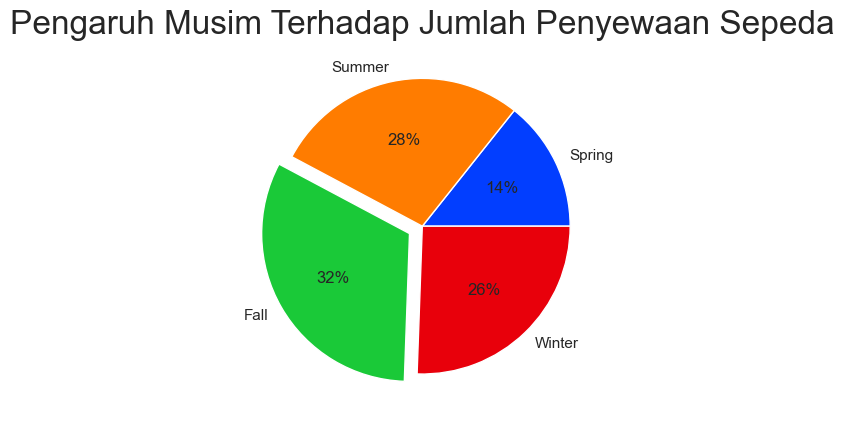

In [71]:
# Visualisasi permasalahan bisnis pertama
season_total_count = day_df.groupby('season')['cnt'].sum()
season = ("Spring","Summer","Fall","Winter")
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = (0, 0, 0.1, 0)
palette_color = sns.color_palette('bright') 
  
 
plt.pie(season_total_count, labels=season, colors=palette_color, 
        explode=explode, autopct='%.0f%%')
plt.title("Pengaruh Musim Terhadap Jumlah Penyewaan Sepeda", size=24)
plt.show() 

Text(0.5, 1.0, 'Rent Totals By Hours')

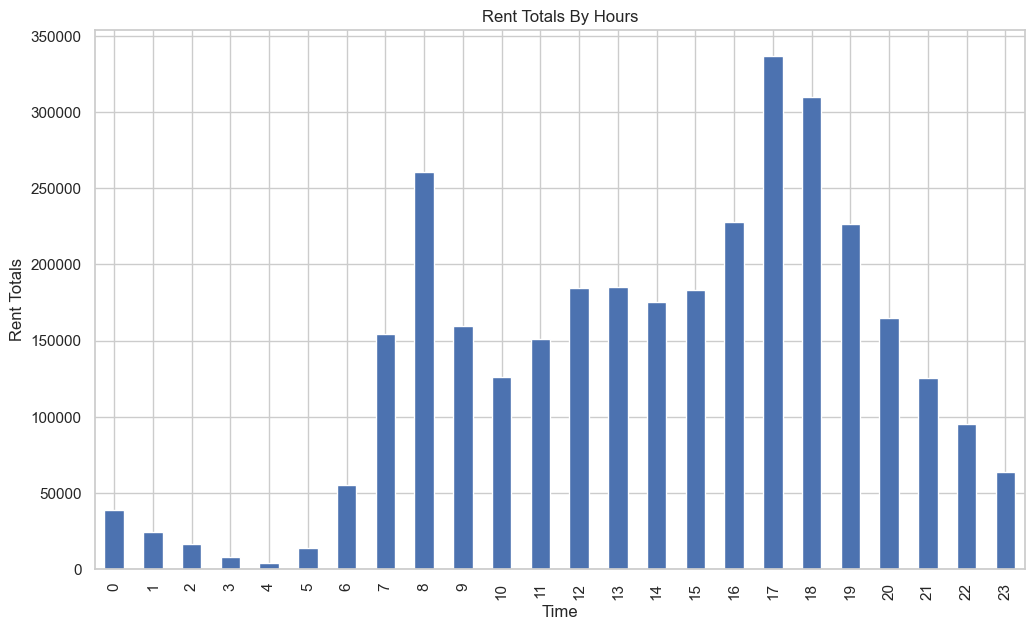

In [110]:
# Visualisasi permasalahan bisnis kedua
plt.figure(figsize=(12, 7))
hour_total_count = hour_df.groupby('hr')['cnt'].sum().plot.bar()
# Menambahkan label pada sumbu-sumbu dan judul plot
plt.xlabel('Time')
plt.ylabel('Rent Totals')
plt.title('Rent Totals By Hours')

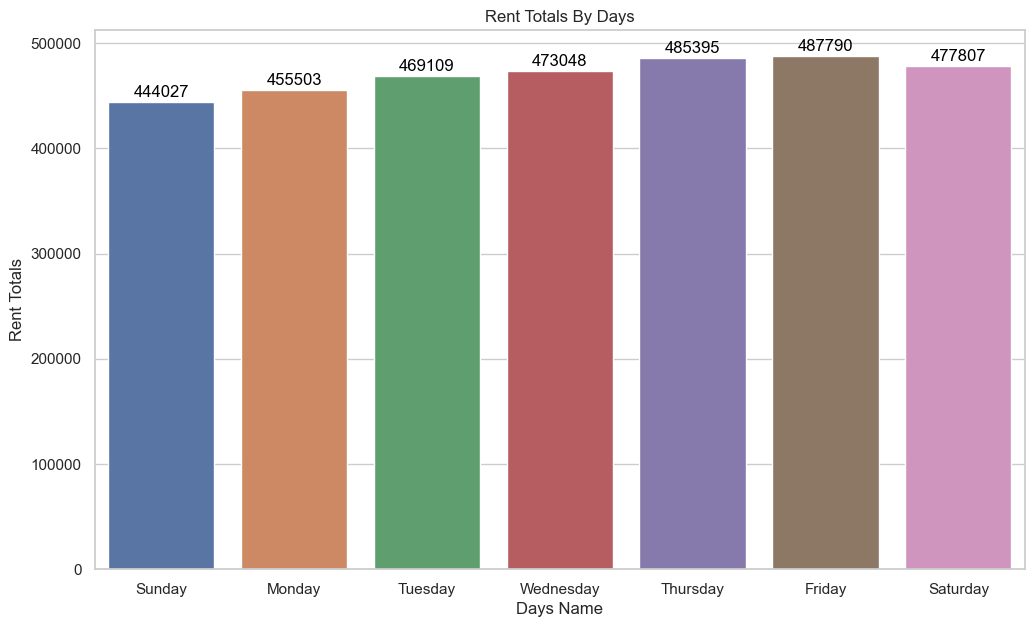

In [115]:
# Visualisasi permasalahan bisnis ketiga
day_total_count = day_df.groupby('weekday')['cnt'].sum().reset_index()
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='weekday', y='cnt', data=day_total_count)
day_labels = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
ax.set_xticklabels(day_labels)
plt.xlabel('Days Name')
plt.ylabel('Rent Totals')
plt.title('Rent Totals By Days')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 7),
                textcoords='offset points')
plt.show()


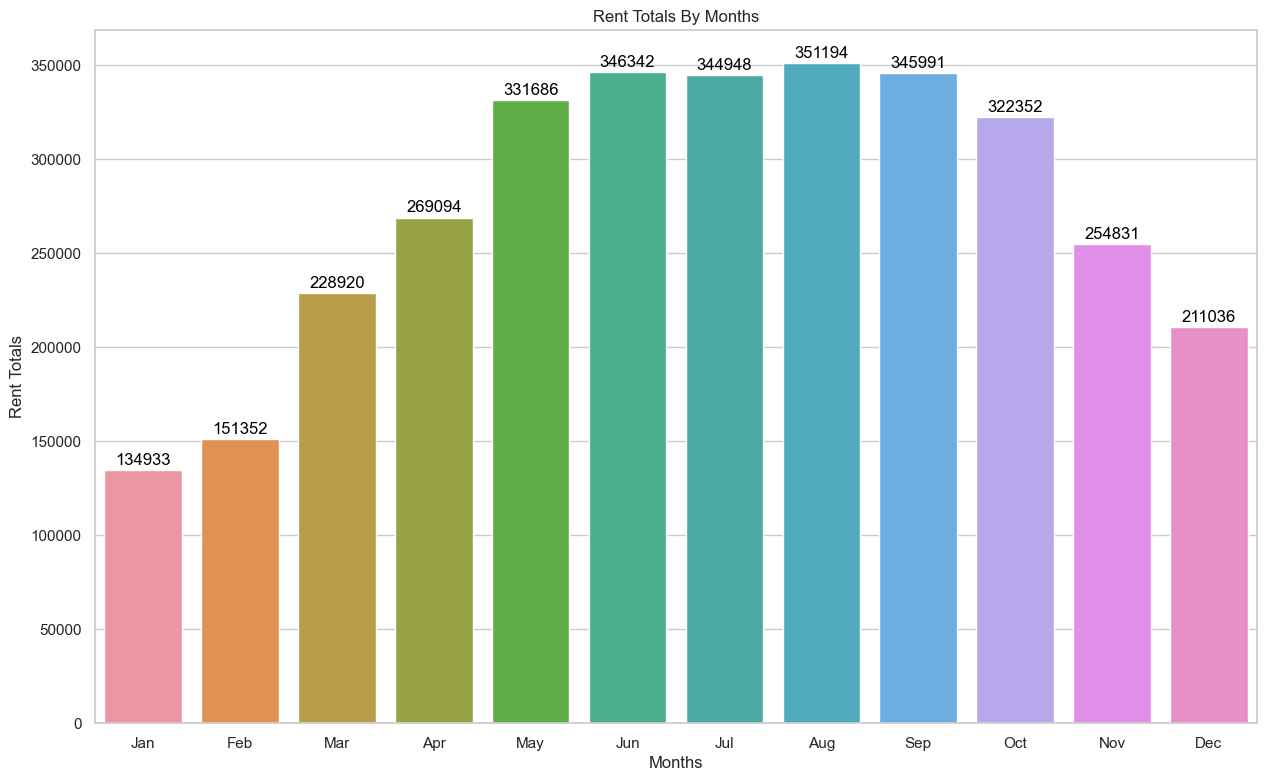

In [116]:
# Visualisasi permasalahan bisnis ke empat
month_total_count = day_df.groupby('mnth')['cnt'].sum().reset_index()
plt.figure(figsize=(15, 9))
ax = sns.barplot(x='mnth', y='cnt', data=month_total_count)

# Mengganti label pada sumbu x sesuai dengan nama bulan
months = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(months)

# Menambahkan label pada sumbu-sumbu dan judul plot
plt.xlabel('Months')
plt.ylabel('Rent Totals')
plt.title('Rent Totals By Months')

# Menambahkan nilai asli count di atas setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 7),
                textcoords='offset points')

# Menampilkan plot
plt.show()

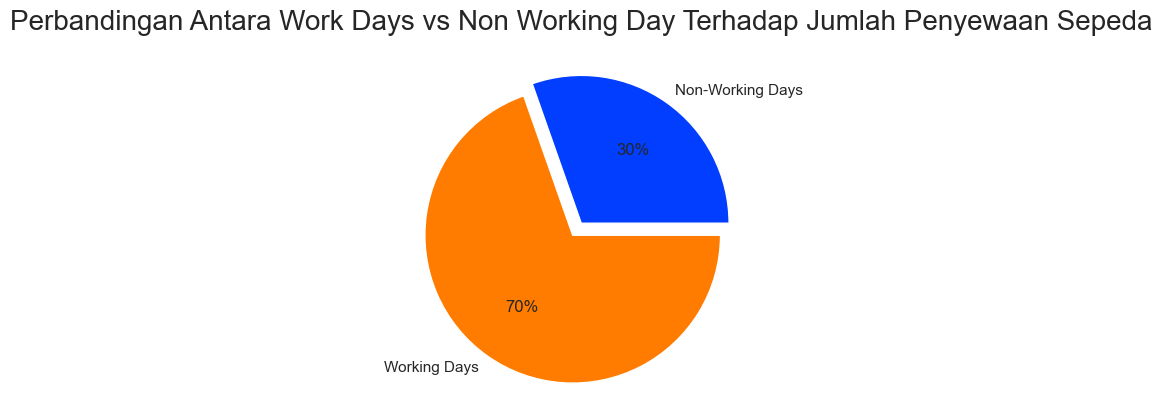

In [117]:
# Visualisasi permasalahan bisnis terakhir
workingday_total_count = day_df.groupby('workingday')['cnt'].sum()
weekdays = ("Non-Working Days","Working Days")
colors = ('#8B4513', '#FFF8DC')
explode = (0, 0.1)
palette_color = sns.color_palette('bright') 
  
 
plt.pie(workingday_total_count, labels=weekdays, colors=palette_color, 
        explode=explode, autopct='%.0f%%')
plt.title("Perbandingan Antara Work Days vs Non Working Day Terhadap Jumlah Penyewaan Sepeda", size=20)
plt.show() 